In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [6]:
list_mol_tags('CDMS')

 tag           molecule           #lines  lg(Q(1000)) lg(Q(500)) lg(Q(300)) ... lg(Q(75)) lg(Q(37.5)) lg(Q(18.75)) lg(Q(9.375)) lg(Q(5.000)) lg(Q(2.725))
------ ------------------------ --------- ----------- ---------- ---------- ... --------- ----------- ------------ ------------ ------------ ------------
  4501                     H2D+       196         nan     2.2148     1.8834 ...    0.9882      0.4919       0.0846       0.0016          0.0          0.0
  5501                     HD2+       163         nan        nan     1.9098 ...    1.0326      0.6405       0.3772       0.3049       0.3011        0.301
  5502                     HeH+        18       1.332     1.0335     0.8192 ...    0.2874      0.0904       0.0075          0.0          nan          nan
 12501                   C-atom         2      0.9359     0.9177     0.8939 ...    0.7295      0.5494       0.3075       0.0962       0.0114       0.0002
 12502                       BH        15         nan        nan     1.2565 

tag,molecule,#lines,lg(Q(1000)),lg(Q(500)),lg(Q(300)),lg(Q(225)),lg(Q(150)),lg(Q(75)),lg(Q(37.5)),lg(Q(18.75)),lg(Q(9.375)),lg(Q(5.000)),lg(Q(2.725))
int64,str24,str9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
4501,H2D+,196,nan,2.2148,1.8834,1.6986,1.4401,0.9882,0.4919,0.0846,0.0016,0.0,0.0
5501,HD2+,163,nan,nan,1.9098,1.7243,1.4652,1.0326,0.6405,0.3772,0.3049,0.3011,0.301
5502,HeH+,18,1.332,1.0335,0.8192,0.7015,0.5406,0.2874,0.0904,0.0075,0.0,nan,nan
12501,C-atom,2,0.9359,0.9177,0.8939,0.8744,0.8363,0.7295,0.5494,0.3075,0.0962,0.0114,0.0002
12502,BH,15,nan,nan,1.2565,1.1339,0.9629,0.6781,0.4105,0.1794,0.0334,nan,nan
12503,C+,1,0.7521,0.727,0.6947,0.669,0.6209,0.5032,0.3713,0.3077,0.3011,0.301,0.301
13501,C-13,7,1.2369,1.2188,1.195,1.1755,1.1374,1.0305,0.8504,0.6085,0.3972,0.3125,0.3012
13502,CH,513,nan,2.3005,2.0822,1.9608,1.7924,1.5175,1.2752,1.0864,0.9523,0.9013,0.8906
13503,CH+,19,nan,1.4051,1.1861,1.0641,0.8942,0.6124,0.3512,0.1342,0.0177,0.0004,0.0


In [4]:
# Get only the cubes that have our line of interest in them
mol_tag = 40001 # 40502
cubes, tbl = fetch_cubes(cubefns, catalog='JPL', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=6>
    FREQ      ERR    LGINT    DR    ELO     GUP   TAG   QNFMT QN'  QN" 
    MHz       MHz   MHz nm2        1 / cm                              
  float64   float64 float64 int64 float64  int64 int64  int64 str3 str3
----------- ------- ------- ----- -------- ----- ------ ----- ---- ----
  102499.11    0.09 -5.1585     3 133.6709    13 -40001   202  6 5  5 5
 102516.573    0.09 -4.8048     3   88.628    13 -40001   202  6 4  5 4
102530.3487   0.003 -4.3004     3  53.5946    26 -40001   202  6 3  5 3
102540.1447   0.002 -4.4754     3  28.5708    13 -40001   202  6 2  5 2
102546.0241   0.001 -4.4052     3  13.5565    13 -40001   202  6 1  5 1
102547.9842   0.001 -4.3825     3   8.5517    13 -40001   202  6 0  5 0, <Table length=6>
    FREQ      ERR    LGINT    DR    ELO     GUP   TAG   QNFMT QN'  QN" 
    MHz       MHz   MHz nm2        1 / cm                              
  float64   float64 float64 int64 float64  int64 int64  int64 str3 str3
----------- ------- ------- 

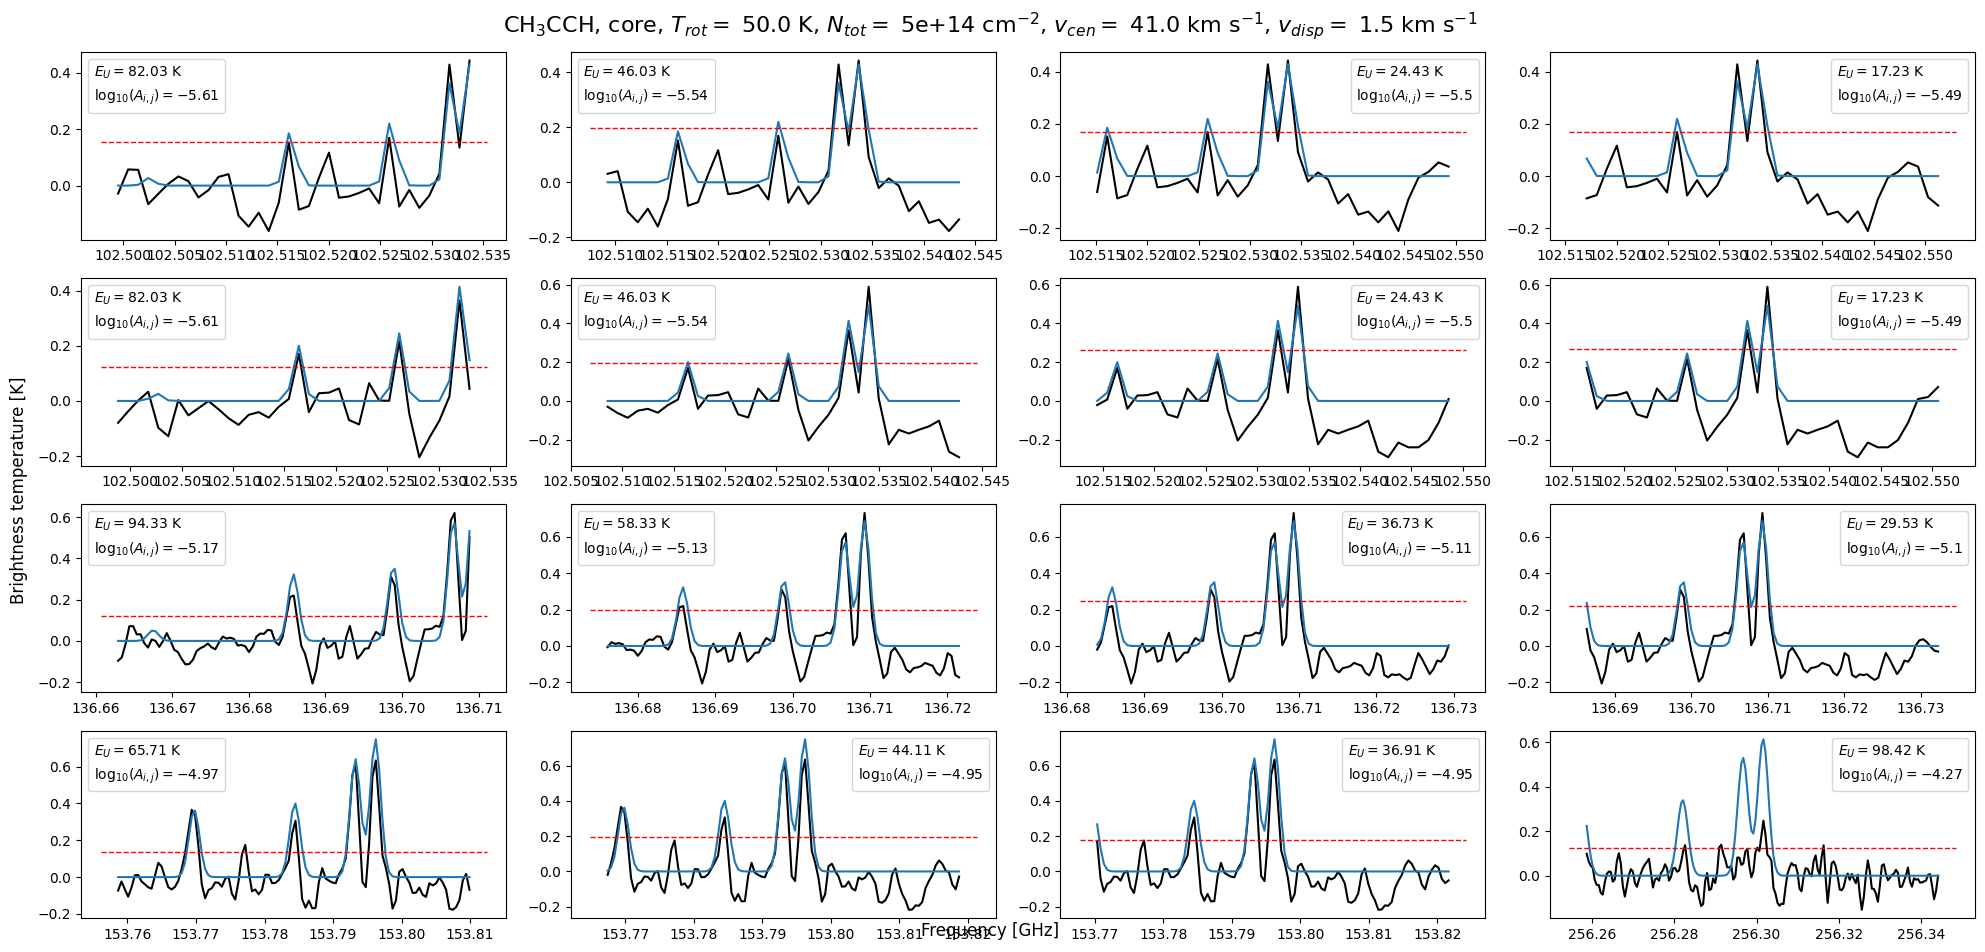

In [10]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 50., N_tot = 5.0e+14, v_cen = 41.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=10, 
               nrows=4, ncols=4, parse_loc=False, line_by_line=True, name_for_plot=f'CH$_3$CCH', extr_type="coord", crd=crd,
               aij_cutoff=-6, show_2_sigma=True)

In [11]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

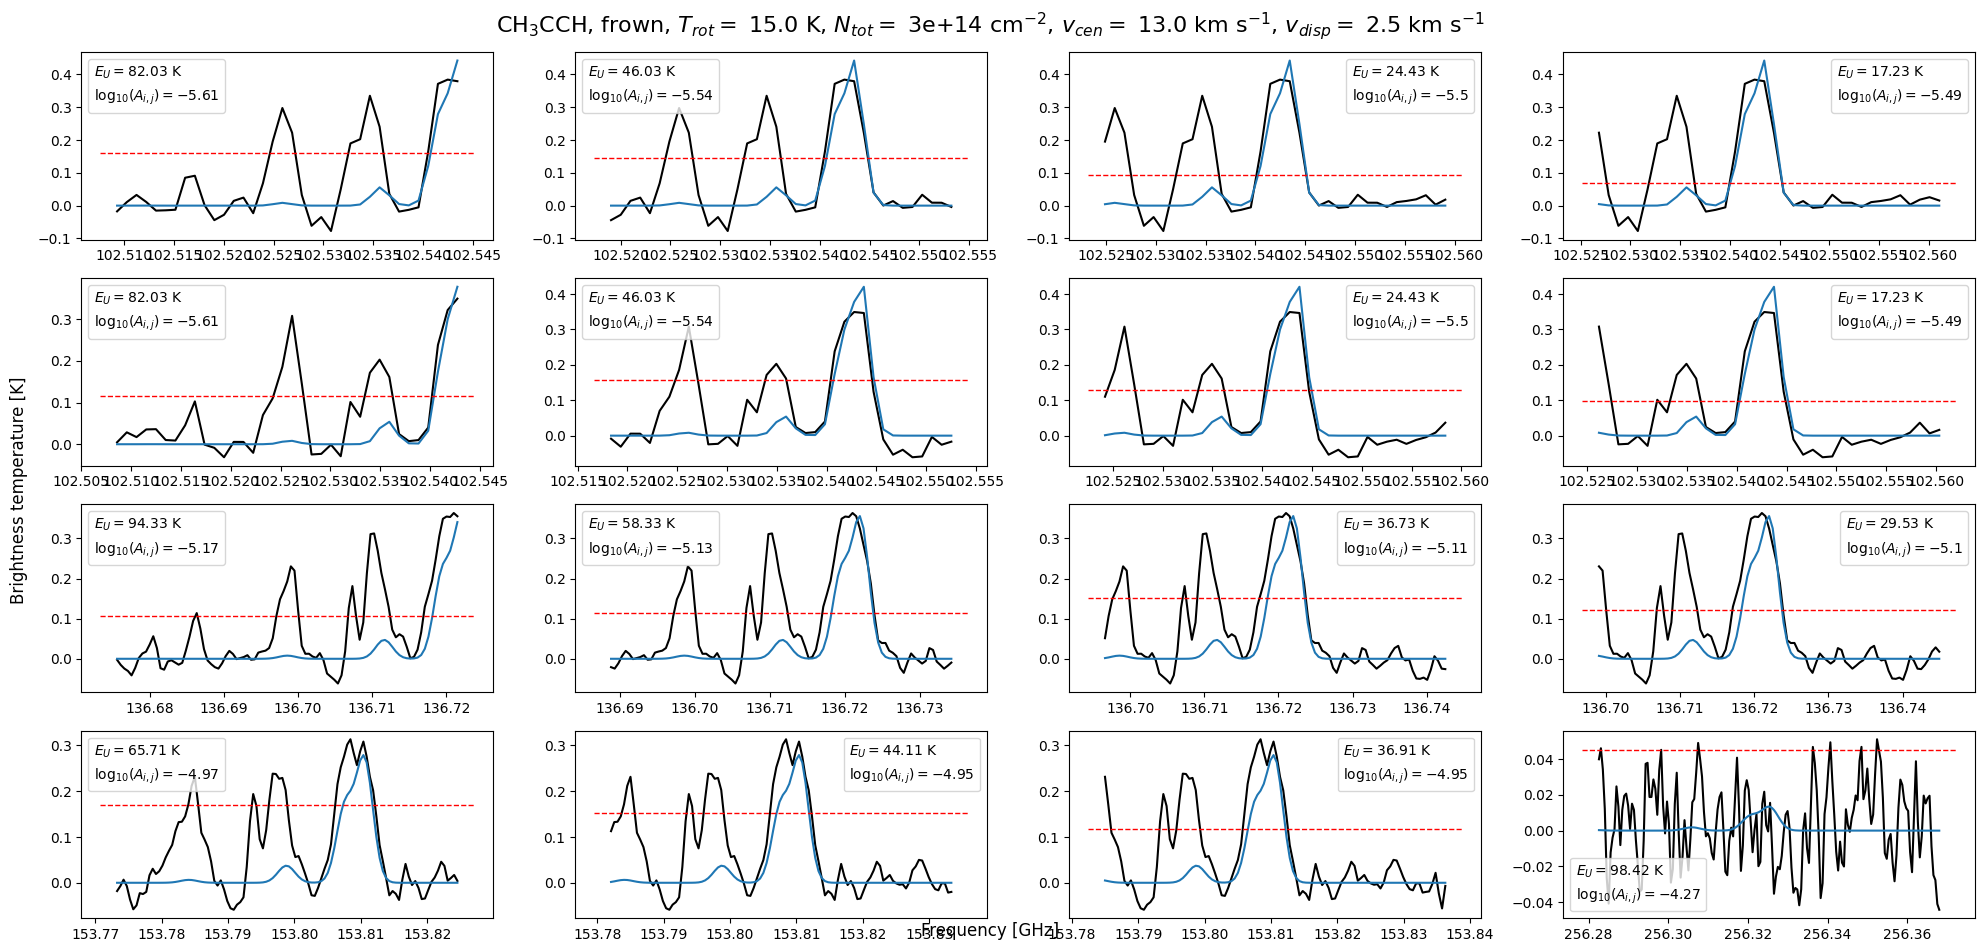

In [12]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 15., N_tot = 3.0e+14, v_cen = 13.*u.km/u.s, v_disp = 2.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=10, 
               nrows=4, ncols=4, parse_loc=False, line_by_line=True, name_for_plot=f'CH$_3$CCH', extr_type="reg", just_data=False,
               aij_cutoff=-6, return_freqs=True, show_2_sigma=True)

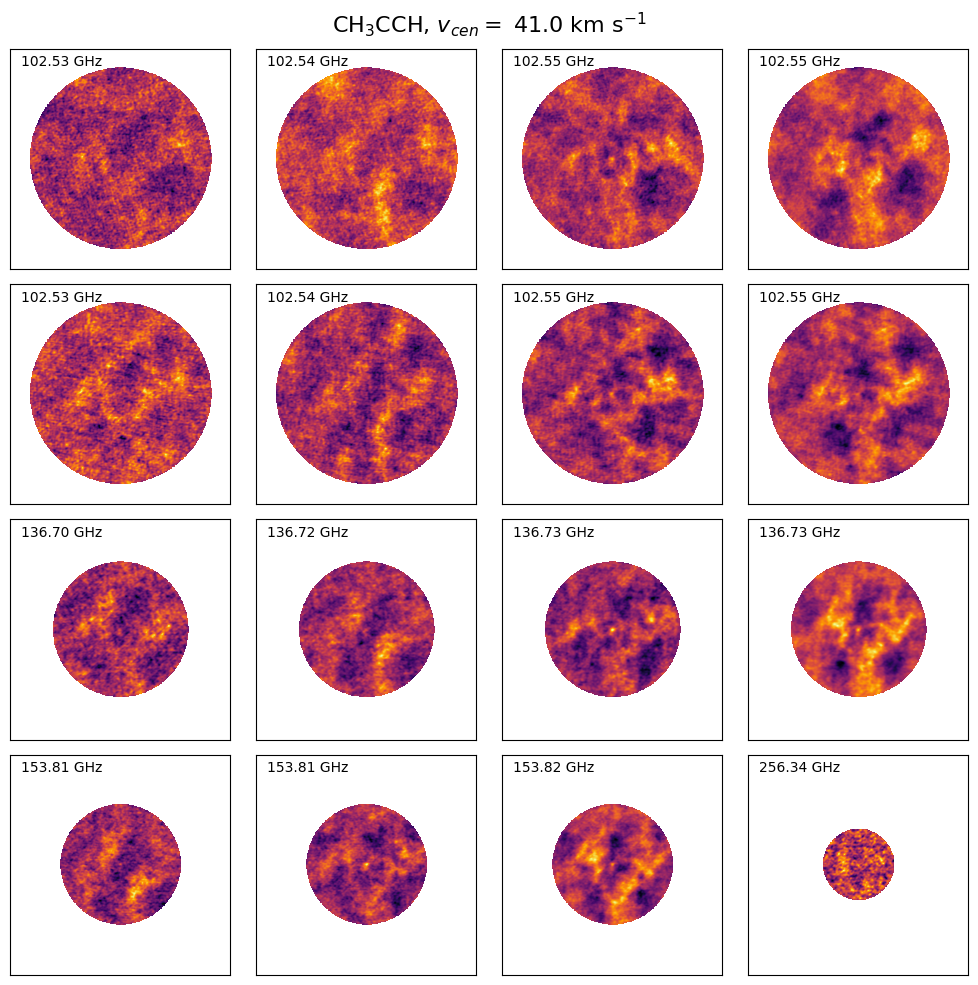

In [13]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=41*u.km/u.s, fig_width=10, fig_height=10, nrows=4, ncols=4, name_for_plot=f'CH$_3$CCH')

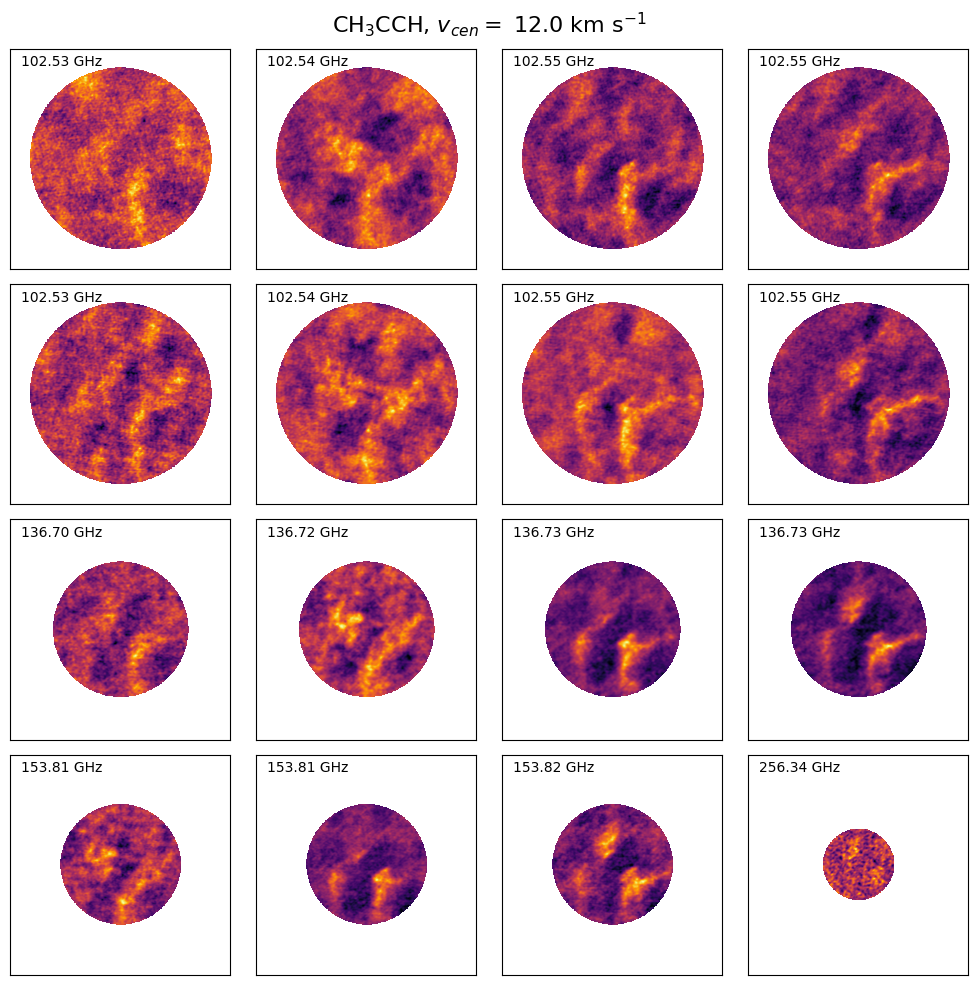

In [14]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=12*u.km/u.s, fig_width=10, fig_height=10, nrows=4, ncols=4, name_for_plot=f'CH$_3$CCH')